<a href="https://colab.research.google.com/github/alkindiisda/bangkityog3/blob/master/bangkityog3(Copy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Assignment #05-W05-First Machine Learning Project - MLCC Project

Project Members:

*   Al Kindi Isda - alkindiisda@gmail.com
*   Bayu Dwi P - mr.ilhamtohari@gmail.com
*   Ilham Tohari - bayud40@gmail.com


# About the Dataset

The csv file contains 5172 rows, each row for each email. There are 3002 columns. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words. For each row, the count of each word(column) in that email(row) is stored in the respective cells. Thus, information regarding all 5172 emails are stored in a compact dataframe rather than as separate text files.

# Pulling dataset from github

In [2]:
import os
import urllib.request
import matplotlib.pyplot as plt
urllib.request.urlretrieve('https://github.com/alkindiisda/bangkityog3/releases/download/1.0/email-spam-data.zip', 'email-spam-data.zip')
!unzip email-spam-data.zip

Archive:  email-spam-data.zip
  inflating: emails.csv              


# Show raw data

In [4]:
import pandas as pd
df = pd.read_csv("emails.csv")
#rows and cols)
df.head(5)

,Email No.,the,to,ect,and,for,of,a,you,hou,in,on,is,this,enron,i,be,that,will,have,with,your,at,we,s,are,it,by,com,as,from,gas,or,not,me,deal,if,meter,hpl,please,...,bold,catch,performing,accepted,matters,batch,continuing,winning,symbol,offsystem,decisions,produced,ended,greatest,degree,solmonson,imbalances,fall,fear,hate,fight,reallocated,debt,reform,australia,plain,prompt,remains,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,18,21,13,0,1,61,4,2,0,0,2,0,12,9,95,4,3,3,3,12,3,1,21,1,12,0,1,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,4,2,0,0,0,8,0,0,0,0,0,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,1,5,9,2,0,16,2,0,0,1,1,0,2,1,36,3,1,2,0,2,3,0,10,2,5,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,3,12,2,2,0,30,8,0,0,2,0,0,7,0,19,2,4,2,0,4,1,2,6,0,6,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [5]:
#emails details
print("total emails : ", len(df))
print  ("total spam emails : ", len(df[df['Prediction']==1]) )
print  ("total normal emails : ", len(df[df['Prediction']==0]) )

total emails :  5172
total spam emails :  1500
total normal emails :  3672


Text(0.5, 1.0, 'Plot of Emails count with email type')

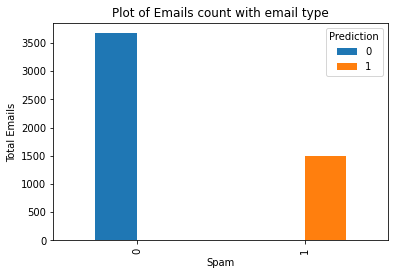

In [6]:
#plot email
df1 = df.groupby(['Prediction','Prediction'])['Prediction','Prediction'].size().unstack()

ax=df1.plot(kind='bar')
ax.set_ylabel("Total Emails")
ax.set_xlabel("Spam")
ax.set_title("Plot of Emails count with email type")

KeyError: ignored

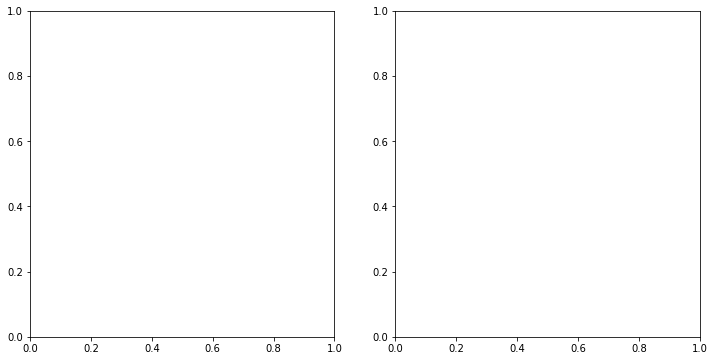

In [0]:
#frequency

bins = [0,100,200,300,350,400,500,600,800,1000,1500,2000,3000,4000,5000,6000,10000,20000]


fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6))
fig.subplots_adjust(hspace=.5)

df_sub=df[ (df['Prediction']==0)]
df1 = df_sub.groupby(pd.cut(df_sub['token_count'], bins=bins)).token_count.count()
df1.index=[a.right for a in df1.index]
res1=df1.plot(kind='bar',ax=axes[0])
res1.set_xlabel('Email tokens length')
res1.set_ylabel('Frequency')
res1.set_title('Token length Vs Frequency for Enron Normal Emails')


df_sub=df[(df['Prediction']==1)]
df1 = df_sub.groupby(pd.cut(df_sub['token_count'], bins=bins)).token_count.count()
df1.index=[a.right for a in df1.index]
res2=df1.plot(kind='bar',ax=axes[1])
res2.set_xlabel('Email tokens length')
res2.set_ylabel('Frequency')
res2.set_title('Token length Vs Frequency for Enron Spam Emails')

# Preprocessing

In [0]:
df_copy = df.copy()

In [0]:
X = df_copy.drop(columns=['Prediction','Email No.'])
Y = df_copy['Prediction']

In [27]:
Y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Prediction, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print ('train data shape: ', X_train.shape, y_train.shape)
print ('validation data shape :' , X_test.shape, y_test.shape)

train data shape:  (3620, 3000) (3620,)
validation data shape : (1552, 3000) (1552,)


In [35]:
y_train.head(10)

3542    0
1266    0
2911    1
652     0
3411    0
4182    0
4869    1
2758    0
2769    1
3407    1
Name: Prediction, dtype: int64

In [0]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [0]:
import sklearn
from sklearn import metrics
from sklearn import svm
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder

In [0]:
model_save_path="checkpoints/spam_detector_enron_model.h5"

In [0]:
input_layer = Input(shape=(X.shape[0],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(Y.shape[0], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [55]:
print(model.summary())

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 5172)]            0         
_________________________________________________________________
dense_30 (Dense)             (None, 15)                77595     
_________________________________________________________________
dense_31 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_32 (Dense)             (None, 5172)              56892     
Total params: 134,647
Trainable params: 134,647
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
history = model.fit(X_train, y_train, batch_size=5, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50


ValueError: ignored